# Pipeline for analysis

## Pre processing raw data

Importing the appropiate directories

In [ ]:
from DE import networkAnalysis as na

clusterDirectory need to point towards directory in which all the clusters can be found. 
It will then loop through all of the data files, gathering the sample ids from all cluster and create individual .csv files for analysis in R

In [ ]:
csvpath = "//home/jacob/examensarbete/test.csv"
obj = na()
obj.readCsv(csvpath)
obj.renameCol('Unnamed: 0', 'gene_id')

In [ ]:
obj.medlog2(1)

In [ ]:
variance = 0.5
obj.filterVariantGenes(variance)

In [ ]:
obj.toCsv('/home/jacob/examensarbete/software/data/test_var({}).txt'.format(variance*100), '\t')

## Running SRIQ

In [ ]:
from runSRIQ import runSRIQ as rs
import numpy

In [ ]:
# data = 'test_var({})'.format(variance*100)
data = 'test_mc_log2var(80)'
# cutOff = [round(x, 2) for x in numpy.arange(0.4,0.9, 0.02)]
cutOff = [0.9,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80,0.79,0.78,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.7,0.69,0.68,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.6,0.59,0.58,0.57,0.56,0.55,0.54,0.53,0.52,0.51,0.5,0.49,0.48,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.32,0.31,0.3,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.22,0.21,0.2,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.0]

In [ ]:
rs(data, cutOff)

In [ ]:
from IPython.display import Image

path = '/home/jacob/examensarbete/software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/VRLA_test_10000_Clusters_Frequencies.png'
Image(filename=path)

In [ ]:
from IPython.display import Image

path = '/home/jacob/examensarbete/software/output/VRLA_test_1000itr_500var_10r/1000/QC_Spiral(false)/VRLA_test_1000_Clusters_Frequencies.png'
Image(filename=path)

## Overview of the output

In [ ]:
from DE import networkAnalysis as na
csvpath = '/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt'
clusterpath = '/home/jacob/examensarbete/software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/dist(0.76)/3'
cutoffs = {0.49:[6], 0.42:[4]}
demo = na()
demo.demoRun(cutoffs, csvpath,clusterpath, columnname = 'Gene')

## Visualizing SRIQ output

Creates the object from the SRIQ output

/home/jacob/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


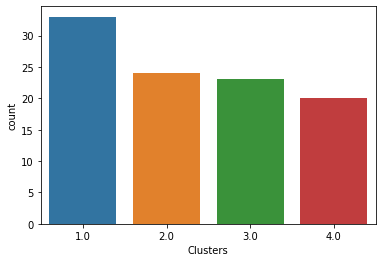

In [5]:
from DE import networkAnalysis as na
csvpath = '/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt'
clusterpath = '/home/jacob/examensarbete/software/output/allt/sparad/10000/QC_Spiral(false)/dist(0.43)/4'

test = na()

test.readSRIQ(csvpath, clusterpath, columnname = 'Gene')

If the genes are in transcript IDs, run this to convert them into symbol for the modules: enrichment, metagenes and centroids.

In [ ]:
test.ensembl2symbol()

Plots the metagenes in an boxplot

In [ ]:
test.metaGenes()

Barplot of the p values from normality test of the genes

In [ ]:
test.normalityTest()

Calculates the logfoldchange if logfold filtering is wanted (which is recommended)

In [ ]:
test.logFoldChange()

Creates a pca model and displays it screeplot

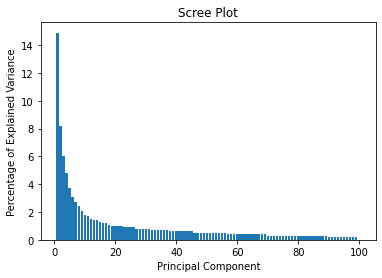

In [6]:
test.screePlot()

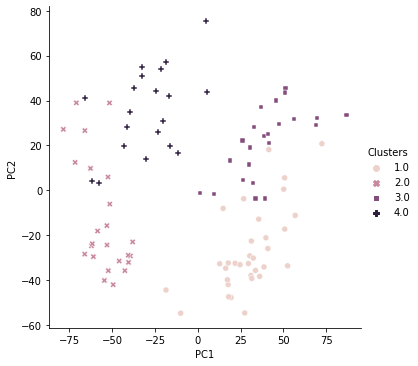

In [7]:
test.pcaPlot()

In [ ]:
test.Umap(4)

Calculates the centroids for each sample. Distribution plot will be shown, and when plotting the genexpression as labels for the samples

In [ ]:
test.centroids(method = 'spearman')

Filter variance, both bottom and top can be filtered.

In [ ]:
bottom = 0.5
top = 1
test.filterVariantGenes(top = top, bottom = bottom)
#test.log2filterin()

Performs desired test for differential gene expression analysis.

In [ ]:
test.diffGeneAnalysis(test = 'mannwhitneyu')

Filter the significant genes based of desired filteringtype.

In [ ]:
test.filtering(filteringType = 'log2fold', threshold = 2)

In [ ]:
test.clusterMap(vmin = -1, vmax = 1, row_cluster= False)

In [ ]:
test.ensemble2gene()

In [ ]:
dbs = ['Human_Gene_Atlas', 'Tissue_Protein_Expression_from_ProteomicsDB','Cancer_Cell_Line_Encyclopedia' ]
test.enrichR(0, dbs)

In [ ]:
test.plotBar()

Survival analysis

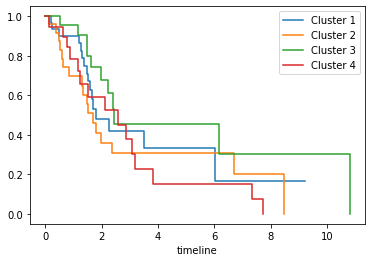

In [8]:
test.kaplanMeier()

# Robustness of clusters

In [ ]:
from runSRIQ import runSRIQ, robustness
saved  = robustness()
[print(f'Cluster {counter +1} {x}') for counter, x in enumerate(saved)]

In [ ]:
from runSRIQ import *
# cutOff = [0.9,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80,0.79,0.78,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.7,0.69,0.68,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.6,0.59,0.58,0.57,0.56,0.55,0.54,0.53,0.52,0.51,0.5,0.49,0.48,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.32,0.31,0.3,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.22,0.21,0.2,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.0]
data = 'test_mc_log2var(80).txt'

# runSRIQ(data = data, cutOff = cutOff)


splitRunSRIQ(data)

In [ ]:
import pandas as pd
df = pd.read_csv('/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt', sep= '\t')
df2 = pd.read_csv('../software/data/noCluster1.txt', sep = '\t')

In [ ]:
lista = list(df2)
df[lista]

In [ ]:
from DE import networkAnalysis as na
csvpath = '/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt'
clusterpath = '/home/jacob/examensarbete/software/output/sparad/10000/QC_Spiral(false)/dist(0.45)/4'

test = na()

test.readSRIQ(csvpath, clusterpath, columnname = 'Gene')
import pandas as pd
from lifelines import CoxPHFitter
df = pd.read_csv(r'clinical_PANCAN_patient_with_followup (1).tsv', sep = '\t', engine = 'python', index_col = 'bcr_patient_barcode')

In [ ]:
patients = ['-'.join(x.split('-')[0:3]) for x in test.sortedClusters[0]]
df = df.filter(items = patients, axis = 'index').loc[:[]]

In [ ]:
df_d = pd.get_dummies(df.dropna(axis = 1), drop_first = True)

In [ ]:
list(df)

In [ ]:
columns = ['radiation_therapy', 'egfr_mutation_performed','egfr_mutation_result', 'egfr_mutation_identified']
df[columns]

In [ ]:
df